# Range

### 22 RANGE-фрейм 1

Есть таблица сотрудников `employees`:

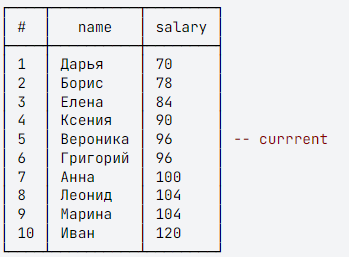

В запросе задано окно:

In [ ]:
WINDOW w AS (ORDER BY salary
             RANGE BETWEEN 3 PRECEDING AND 5 FOLLOWING)

Укажите начало и конец фрейма, если текущая запись — Вероника.

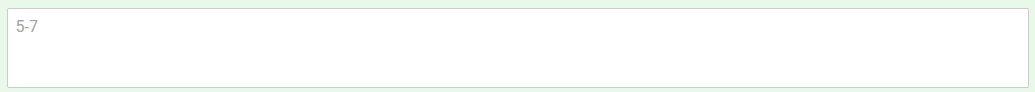

### 23 RANGE-фрейм 2

Есть таблица сотрудников `employees`:

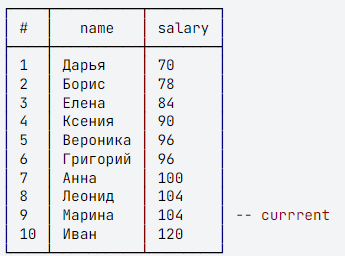

В запросе задано окно:

In [ ]:
WINDOW w AS (ORDER BY salary
             RANGE BETWEEN CURRENT ROW AND CURRENT ROW)

Укажите начало и конец фрейма, если текущая запись — Марина.

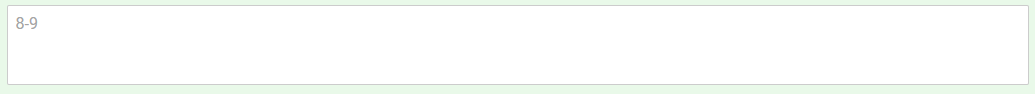

### 24 RANGE-фрейм 3

Есть таблица сотрудников `employees`. Предположим, для каждого человека мы хотим посчитать количество сотрудников, которые получают такую же или большую зарплату, но не более чем +10 тыс. ₽ (p10_cnt):

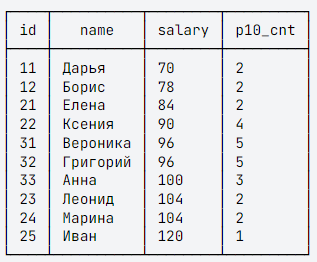

Напишите запрос, который это сделает.

Для простоты не будем отсеивать самого человека. Например, для Ивана с максимальной зарплатой p10_cnt = 1, так как сам Иван тоже учтен в расчетах.

Сортировка результата: salary, id

In [ ]:
SELECT id, 
       name, 
       salary,
       COUNT(*) OVER w AS p10_cnt
  FROM employees
WINDOW w AS (ORDER BY salary RANGE BETWEEN CURRENT ROW AND 10 FOLLOWING)
 ORDER BY salary, id

### 25 RANGE-фрейм 4

Есть таблица сотрудников `employees`. Предположим, для каждого человека мы хотим определить максимальную зарплату среди тех, у кого зарплата на 10–30 тыс. ₽ меньше чем у него:

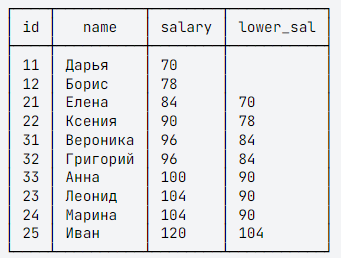

Напишите запрос, который это сделает.

Сортировка результата: salary, id

Пустые ячейки у Дарьи и Бориса — это null.

In [ ]:
SELECT id, 
       name, 
       salary,
       MAX(salary) OVER w AS lower_sal
  FROM employees
WINDOW w AS (ORDER BY salary RANGE BETWEEN 30 PRECEDING AND 10 PRECEDING)
 ORDER BY salary, id